In [14]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="paper", font="monospace")
savedir = 'C:/cygwin64/home/Gergo_PC/code/gergoCode'

In [11]:
pwd

u'C:\\cygwin64\\home\\Gergo_PC\\code\\gergoCode'

In [3]:
x = range(10)
y = range(1,20,2)
w = range(1, 29, 3)
i = range(-1, -29, -3)

In [4]:
print len(x)
print len(y)
print len(w)
print len(i)

10
10
10
10


[[  0   1   2   3   4   5   6   7   8   9]
 [  1   3   5   7   9  11  13  15  17  19]
 [  1   4   7  10  13  16  19  22  25  28]
 [ -1  -4  -7 -10 -13 -16 -19 -22 -25 -28]]


,0,1,2,3,4,5,6,7,8,9
0,0,1,2,3,4,5,6,7,8,9
1,1,3,5,7,9,11,13,15,17,19
2,1,4,7,10,13,16,19,22,25,28
3,-1,-4,-7,-10,-13,-16,-19,-22,-25,-28


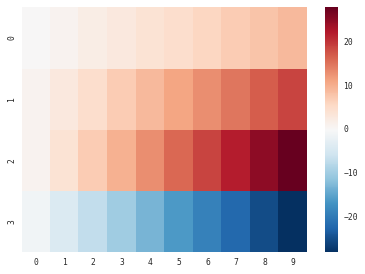

In [5]:
XX=np.vstack((x,y,w,i))
print(XX)
YY = pd.DataFrame(XX)
sns.heatmap(XX)
YY

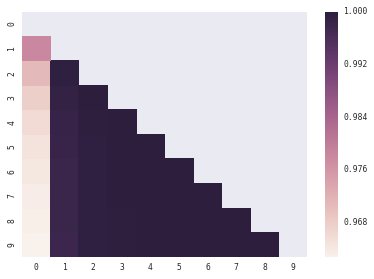

In [6]:
corr = YY.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask)

[[  9.16666667  18.33333333  27.5        -27.5       ]
 [ 18.33333333  36.66666667  55.         -55.        ]
 [ 27.5         55.          82.5        -82.5       ]
 [-27.5        -55.         -82.5         82.5       ]]
[[ True  True  True  True]
 [False  True  True  True]
 [False False  True  True]
 [False False False  True]]


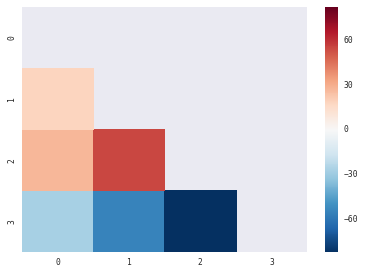

In [7]:
df = (np.cov(YY))
print(df)

# Generate a mask for the upper triangle
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
print(mask)

sns.heatmap(df, mask=mask)

In [19]:
dfH5 = pd.DataFrame(df)
dfH5
#dfH52 = dfH5.to_hdf('/cygwin64/home/Gergo_PC/code/gergoCode/crosstest.h5')

,0,1,2,3
0,9.166667,18.333333,27.5,-27.5
1,18.333333,36.666667,55.0,-55.0
2,27.500000,55.000000,82.5,-82.5
3,-27.500000,-55.000000,-82.5,82.5


In [22]:
#this makes an empty looking files named `store.h5`
store = pd.HDFStore('store.h5')
store

<class 'pandas.io.pytables.HDFStore'>
File path: store.h5
Empty

In [28]:
#this puts the data into the file
store['rabbit'] = dfH5
store

<class 'pandas.io.pytables.HDFStore'>
File path: store.h5
/dfH5              frame        (shape->[4,4])
/rabbit            frame        (shape->[4,4])

In [31]:
print(store.rabbit)
print(store.dfH5)

           0          1     2     3
0   9.166667  18.333333  27.5 -27.5
1  18.333333  36.666667  55.0 -55.0
2  27.500000  55.000000  82.5 -82.5
3 -27.500000 -55.000000 -82.5  82.5
           0          1     2     3
0   9.166667  18.333333  27.5 -27.5
1  18.333333  36.666667  55.0 -55.0
2  27.500000  55.000000  82.5 -82.5
3 -27.500000 -55.000000 -82.5  82.5


In [34]:
#closing the file
store.close()

In [35]:
#sanity check
store.is_open

False